PERFORM SUPERVISED BOUNDARY LAYER CLASSIFICATION
=================
Perform supervised boundary layer classification on prepared datasets thanks to previously trained classifiers.
Take in input the dataset generated by `prepdataset.py` and the pre-trained models generated by `fitclassifier.py`.

Loadings
------------

### Load packages

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pickle

from blcovid import utils
from blcovid import graphics

### Load data and show quicklook

In [4]:
graphics.storeImages=False

In [15]:
datasetpath="../working-directories/1-unlabelled-datasets/DATASET_2015_0217.PASSY2015_BT-T_linear_dz40_dt30_zmax2000.nc"

In [16]:
print("Loading dataset :",datasetpath)
X_raw,t_common,z_common=utils.load_dataset(datasetpath,variables_to_load=['X_raw','time','altitude'])
print("Shape X_raw=",np.shape(X_raw))
print("Percentage of NaN=",100*np.sum(np.isnan(X_raw))/np.size(X_raw),"%")

Loading dataset : ../working-directories/1-unlabelled-datasets/DATASET_2015_0217.PASSY2015_BT-T_linear_dz40_dt30_zmax2000.nc
Shape X_raw= (2112, 2)
Percentage of NaN= 0.0 %


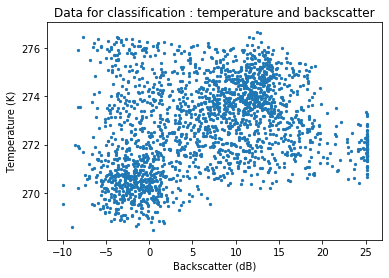

In [17]:
predictors,interpMethod,Dz,Dt,zmax = utils.load_preparation_params(datasetpath)
plt.figure()
plt.title("Data for classification : temperature and backscatter")
if 'Z' in predictors:
    plt.scatter(X_raw[:,0],X_raw[:,1],c=X_raw[:,2],cmap='Blues')
    plt.colorbar(label="Altitude (m agl)")
else:
    plt.scatter(X_raw[:,0],X_raw[:,1],s=5)
plt.xlabel("Backscatter (dB)")
plt.ylabel("Temperature (K)")
plt.show(block=False)

### Load pre-trained classifier

In [18]:
classifierDir='../working-directories/4-pre-trained-classifiers/'
classifierName='LabelSpreading.PASSY2015_BT-T_linear_dz40_dt30_zmax2000.pkl'

# Check if consistent with dataset
"_".join(classifierName.split('.')[-2])=="_".join(datasetpath.split('.')[-2])

True

In [19]:
fc = open(classifierDir+classifierName, 'rb')
clf = pickle.load(fc) 
labelid = eval(clf.label_identification_)
clf

LabelSpreading(alpha=0.2, gamma=20, kernel='knn', max_iter=30, n_jobs=None,
               n_neighbors=7, tol=0.001)

Perform classification
-------------------

### Just predict from the loaded classifier

In [20]:
rawlabl=clf.predict(X_raw)

### Visualize the results

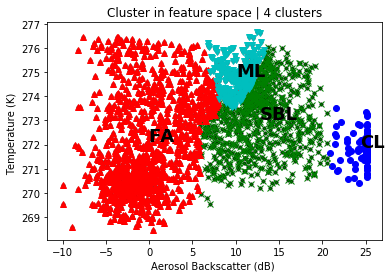

In [21]:
graphics.cluster2Dview(X_raw[:,0],predictors[0],X_raw[:,1],predictors[1],rawlabl,
            clustersIDs=labelid,displayClustersIDs=True)

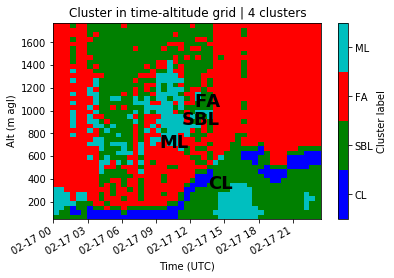

In [22]:
graphics.clusterZTview(t_common,z_common,rawlabl,
            clustersIDs=labelid,displayClustersIDs=True)